# 1986-2016 Olympics Exploratory Data Analysis


* One cannot ignore the importance of sports data analytics in this present age of technology.For that reason, and with the **_2020 Summer Olympics_** just around the corner, starting from July 23, 2021  this __1986-2016 Olympics Exploratory Data Analysis__ will be useful to prepare teams for upcoming olympics,for coaches,athletes who can use  it to improve performance,for sports analytics departments and sports journalists.The analysis asks questions about questions about the participation and performance , different nations, sports and events. 

> * It should be noted  that  olympics are always held after every  **FOUR YEARS**
> * Due to the Covid-19 pandemic, the __Tokyo 2020 Olympics games__ that were to be held last year(2020) were moved to this year.


* The source of this data is Kaggle and to get the Csv file for this data __[Click Here](http://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)__
* From this data set, we are going  to limit our analyses to a few areas and look at olympics Data form when it was first held in 1896 to 2016. 
> * See  **_Data Analysis and Visualization section_** for areas that we will analyse

#### Terms Definition;
 1. **Olympian** is a competitor in the olympic games.
 1. **Octogenerian** is a person who is between 80 to 89 years old

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian


In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="olympic-history-athletes-and-results-analysis")

<IPython.core.display.Javascript object>

In [4]:
#Download Olympics Data from Kaggle
! pip install opendatasets --upgrade --quiet 
import opendatasets as od
download_url = 'https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: everndah
Your Kaggle Key: ········


100%|██████████| 5.43M/5.43M [00:00<00:00, 44.9MB/s]

In [5]:
data_filename = "./120-years-of-olympic-history-athletes-and-results/athlete_events.csv"

In [6]:
#import numpy,pandas,matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline

## Data Preparation and Cleaning

#### _In this section we are going to:_
 
- Load the file using Pandas
- Look at some information about the data & the columns
- Fix any missing or incorrect values
- Drop columns that  we will not  use



In [7]:
#Upload File
olympics_df = pd.read_csv(data_filename)

In [8]:
olympics_df #Olympics Data Frame

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [9]:
olympics_df.size #Check the number  of elements  in olympics_df

4066740

In [10]:
olympics_df.shape #Check the dimentionality of olympics_df

(271116, 15)

In [11]:
olympics_df.describe()#Desrcibe each column

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [12]:
olympics_df.info()# Summary of the olympics data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [13]:
#Percentage of missing values
missing_values = olympics_df.isna().sum()/len(olympics_df)

In [14]:
missing_values 

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

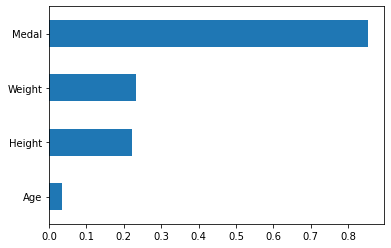

In [15]:
# Plot Columns with  missing values
missing_values[missing_values != 0].plot(kind = "barh");

- The Medals column has many missing values beacause not all athletes got medals.However, we will not drop it since it will be essential for detereming the performnces.We will fill the missing(na) values.

In [16]:
#Fill Medals na values
olympics_df.Medal.fillna("No Medal",inplace = True)

In [17]:
#Confirm if the column has been filled
olympics_df.head(3) #View first 3  rows

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal


In [18]:
#Drop Atheletes ID columns
olympics_df.drop(columns = "ID",inplace = True)

In [19]:
#Confirm if ID column  has  been dropped
olympics_df.head(2) #View first 2  rows

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal


In [20]:
#Unique Denmark and Sweden Team

olympics_df[olympics_df.Team == "Denmark/Sweden"]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
171883,August Nilsson,M,27.0,NaN,NaN,Denmark/Sweden,SWE,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
213255,Eugen Stahl Schmidt,M,38.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
224416,Gustaf Fredrik Sderstrm,M,34.0,NaN,NaN,Denmark/Sweden,SWE,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
227065,Karl Gustaf Vilhelm Staaf (Johansson-),M,19.0,NaN,NaN,Denmark/Sweden,SWE,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
261705,Charles Gustav Wilhelm Winckler,M,33.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [21]:
print("In 1990, the Denmark and Sweden Tag of war teams partcipated as a team under the name Denmark/Sweden")

In 1990, the Denmark and Sweden Tag of war teams partcipated as a team under the name Denmark/Sweden


In [22]:
# Number of distinct Values in olympics_df
olympics_df.nunique()

Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          4
dtype: int64

## Exploratory Analysis and Visualization

#### _In this section,the columns that we will analyse are;_

*Sports*,
*Athletes*,
*Medals*,
*Teams*,
*Sex*,

In [23]:
#Check the columns lables  of the  dataframe
olympics_df.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [24]:
#Check olympics dataframe Index
olympics_df.index

RangeIndex(start=0, stop=271116, step=1)

> #### Below is a line plot representation of Olympians Weights based on Medals;

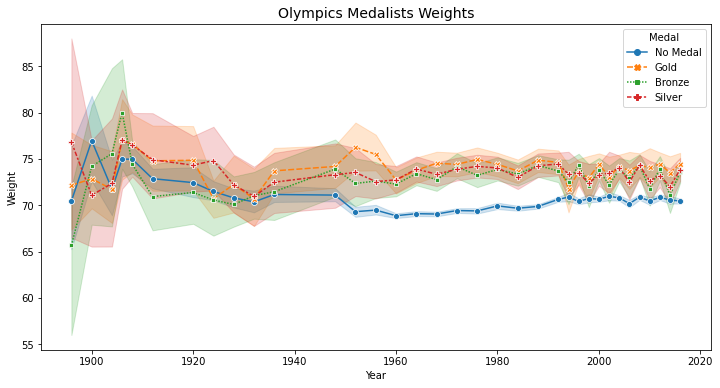

In [25]:
#Plot Medalists Weight

plt.figure(figsize=(12,6))
sns.lineplot(x = "Year",y = "Weight",data = olympics_df,hue = "Medal",style = "Medal",markers=True)

plt.title("Olympics Medalists Weights",fontsize = 14);

* Medalists weights have been  reducing over the years

> #### Below is a line plot representation of Olympians Age based on sex;

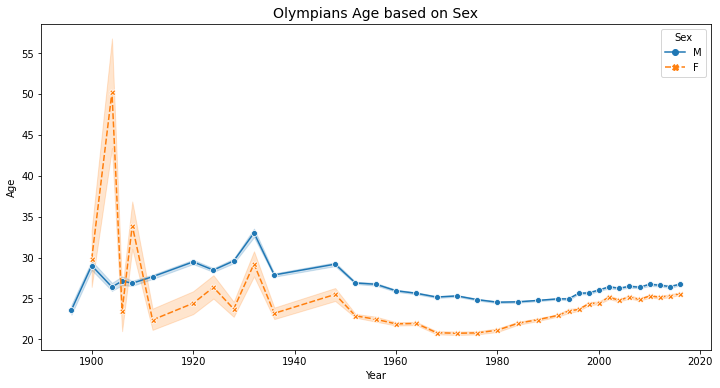

In [26]:
#Plot Medalists Height

plt.figure(figsize=(12,6))
sns.lineplot(x = "Year",y = "Age",data = olympics_df,hue = "Sex",style = "Sex",markers=True,legend="full")

plt.title("Olympians Age based on Sex",fontsize = 14);

* Teams saw the  need  of  having younger olympians over the years.
> In the early years of olympics, Female olympians were older than their Male counterparts,while in recent years they are  younger.

In [27]:
#Female and Male Olympians
olympics_df.Sex.value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

> #### Below is a bargraph representation of Male and Female olympians;

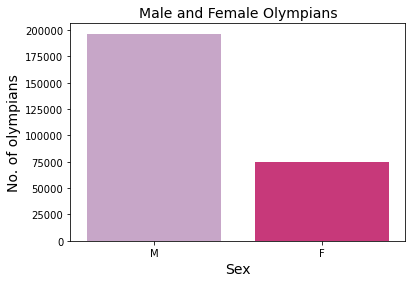

In [28]:
#Bargraph representation of Male and Female olympians

sex = olympics_df.Sex.value_counts().index
No_of_Olympians = olympics_df.Sex.value_counts()

sns.barplot(x = sex,y = No_of_Olympians, palette='PuRd')

plt.xlabel("Sex",fontsize = 14)
plt.ylabel("No. of olympians",fontsize = 14)
plt.title("Male and Female Olympians",fontsize = 14);

* The number of Men that have participated in the  olympics games is more than half of the number of Women who have participated 

> #### Below is a line graph representation of the number of Teams that have been participating in every olympics;

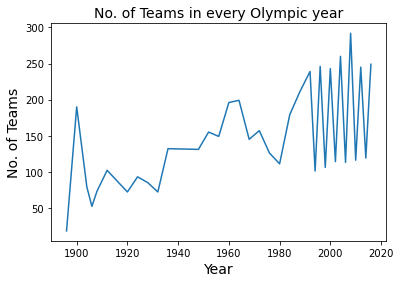

In [29]:
olympics_df.groupby("Year")["Team"].nunique().plot()

plt.xlabel("Year",fontsize = 14)
plt.ylabel("No. of Teams",fontsize = 14)
plt.title("No. of Teams in every Olympic year",fontsize = 14);

* More teams have overtime showed an interest in pariticipating in olympic events since the  number  has  been increasing.

## Athletes

* _We will now ask some questions about olympians:_

### Q1: Which olympic year had the highest number of olympians participating?

In [30]:
year_with_most_olympians = olympics_df.groupby("Year")["Name"].nunique()

In [31]:
year_with_most_olympians.sort_values(ascending = False).head(5) #See Top five years with most olympinas

Year
2016    11174
1992    11172
2008    10880
2000    10639
2004    10537
Name: Name, dtype: int64

In [32]:
#Assign the total number of 2016 olympians to a variable

olympians_2016 = olympics_df["Year"] == 2016

In [33]:
all_2016_olympians = olympics_df.loc[olympians_2016,"Name"].nunique()

In [34]:
print("The 2016 olympics had the highest number of olympians with a total of {} olympians".format(all_2016_olympians ))

The 2016 olympics had the highest number of olympians with a total of 11174 olympians


> #### Below is a pie chart representation of top 5 years with the hightest number of olympians participating;

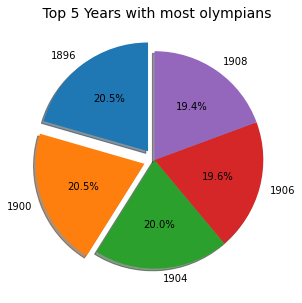

In [35]:
#Pie chart representation of top 5 years with the hightest number of olympians participating
plt.figure(figsize = (10,5))
Top_5 = year_with_most_olympians.sort_values(ascending = False).head(5)
Top_5_indx = year_with_most_olympians.head(5).index
explode = [0.1,0.1,0,0,0]

plt.pie(Top_5,labels=Top_5_indx,autopct='%1.1f%%', startangle=90,shadow = True,explode = explode)

plt.title(" Top 5 Years with most olympians",fontsize= 14);

In [36]:
Top_5_indx

Int64Index([1896, 1900, 1904, 1906, 1908], dtype='int64', name='Year')

> #### Below is a line Graph representation of the number of olympians in every olympics;

In [37]:
no_of_olympians = year_with_most_olympians
correspoding_years = year_with_most_olympians.index

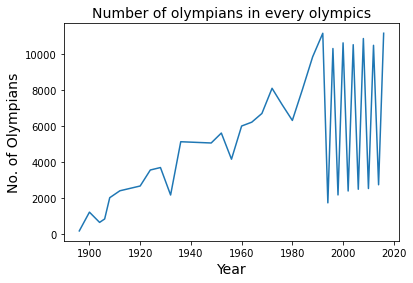

In [38]:
sns.lineplot(x = correspoding_years,y =no_of_olympians)
plt.title("Number of olympians in every olympics",fontsize= 14)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("No. of Olympians",fontsize = 14);

* The number of olympians had  been increasing  upto around the  year 2000 when the numbers started fluctuating

 ### Q2:Which olympian had most appearances in olympic events?

In [39]:
## Athlete With the Most appearances 
Most_appearing_athelete = olympics_df.Name.value_counts()

In [40]:
Most_appearing_athelete

Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
                            ..
Dario Alejandro Gasco        1
David Toivo Teivonen         1
Cveto Pretnar                1
Hiram Ricardo Mier Alans     1
James Edwin "Jim" Scherr     1
Name: Name, Length: 134732, dtype: int64

* The Athlete who had most appearances was Robert Tait McKenzie.

In [41]:
#Most_appearing_athlete data frame
Most_appearing_athlete = olympics_df[olympics_df.Name == "Robert Tait McKenzie"]

In [42]:
Most_appearing_athlete.head(3) #View first 5 rows

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
154798,Robert Tait McKenzie,M,44.0,NaN,NaN,Canada,CAN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,No Medal
154799,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal
154800,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal


In [43]:
#Years in which Robert Tait McKenzie's had most apperances and in which Event

#Robert = Most_appearing_athlete["Year"],["Event"]
Robert_events = Most_appearing_athlete["Event"].value_counts()

In [44]:
Robert_events

Art Competitions Mixed Sculpturing, Unknown Event         48
Art Competitions Mixed Sculpturing, Statues                7
Art Competitions Mixed Sculpturing                         1
Art Competitions Mixed Sculpturing, Medals                 1
Art Competitions Mixed Sculpturing, Medals And Reliefs     1
Name: Event, dtype: int64

In [45]:
print("Robert Tait McKenziehas has had the most appearances with a total of {} appearances".format(Robert_events.max()))

Robert Tait McKenziehas has had the most appearances with a total of 48 appearances


> #### Below is a horizontal bar graph represenatation of events in which Robert Tait McKenziehas made most appearances;

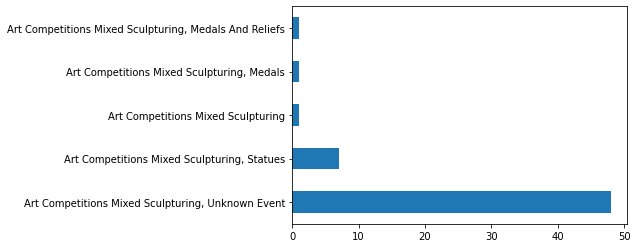

In [46]:
Robert_events.plot(kind = "barh");

### Q3: Who is the oldest Olympian in olympics history?

In [47]:
#Get name and age of oldest olympian
olympics_df[["Name","Age"]].sort_values("Age",ascending = False).head(5) #View first five rows

,Name,Age
257054,John Quincy Adams Ward,97.0
98118,Winslow Homer,96.0
60863,Thomas Cowperthwait Eakins,88.0
60861,Thomas Cowperthwait Eakins,88.0
60862,Thomas Cowperthwait Eakins,88.0


* The  oldest olympian was John Quincy Adams Ward

In [48]:
#Details of oldest olympian
olympics_df[olympics_df.Name == "John Quincy Adams Ward"]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal


### Q4 : Who are the octogenerian olympians?

In [49]:
#Octogenerian Olympians

Octogenerian_Olympians = olympics_df[(olympics_df.Age >= 80)& (olympics_df.Age <= 89)]
Octogenerian_Olympians

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
9371,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
60861,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
60862,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
60863,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
138812,Max Liebermann,M,80.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",No Medal
138813,Max Liebermann,M,80.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",No Medal
138814,Max Liebermann,M,80.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",No Medal
154855,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",No Medal
236912,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,No Medal


In [50]:
Octogenerian_Olympians["Name"].nunique() #See the no. of unique values in the name column

5

In [51]:
print("There have been {} octogenerian olympians,they have all participated in Arts Competition and non of them has  won a  medal".format(Octogenerian_Olympians["Name"].nunique()))

There have been 5 octogenerian olympians,they have all participated in Arts Competition and non of them has  won a  medal


### Q5: Who was the  youngest olympian?

In [52]:
#youngest_olympian
youngest_olympian = int(olympics_df.Age.min())

In [53]:
youngest_olympian

10

In [54]:
olympics_df[olympics_df.Age == 10] #youngest_olympian dataframe


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [55]:
print("{} years old Dimitrios Loundras was the youngest olympian ever".format(youngest_olympian))

10 years old Dimitrios Loundras was the youngest olympian ever


### Q6: How old was the youngest female olympian?

In [56]:
Female_olympians = (olympics_df.Sex == "F") #Get all female olympians

In [57]:
youngest_female_olympian = olympics_df.loc[Female_olympians,"Age"].sort_values(ascending = True) #Sort their ages from the younrest to the oldest

In [58]:
#Drop na values from youngest_female_olympian series
youngest_female_olympian_df = youngest_female_olympian.dropna(inplace = False)
youngest_female_olympian_df

43468     11.0
102916    11.0
94058     11.0
252230    11.0
237141    11.0
          ... 
35445     73.0
201631    74.0
201632    74.0
201633    74.0
201634    74.0
Name: Age, Length: 74098, dtype: float64

In [59]:
print("The youngest female olympians were 11 years old")

The youngest female olympians were 11 years old


In [60]:
#11 year old olympians

Eleven_year_old_female_olympians = olympics_df[(olympics_df.Sex == "F") & (olympics_df.Age == 11)]

In [61]:
#Which sport had most eleven years old female olympians

Eleven_year_old_female_olympians.Sport.value_counts()

Figure Skating    7
Swimming          4
Gymnastics        1
Name: Sport, dtype: int64

* Most  eleven years old Female olympians participated in Figure Skating Sport

In [62]:
# Teams that have had youngest female olympians

Eleven_year_old_female_olympians["Team"].unique()#Get unique elements from Eleven_year_old_female_olympians Team Column

array(['Great Britain', 'Italy', 'Norway', 'Romania', 'Japan', 'China',
       'South Africa', 'Puerto Rico'], dtype=object)

### Q7: Number of under 20 Gold Medalists from Team USA?

In [63]:
#Under 20 Team USA Gold medalists
young_medalists = (olympics_df["Age"] < 20)& (olympics_df["Medal"]== "Gold") & (olympics_df["Team"]== "United States")

In [64]:
under_20 = olympics_df.loc[young_medalists] #under_20 dataframe

In [65]:
under_20.head(3) #View first 3 rows

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
787,"Edgar Allen ""Ed"" Ablowich",M,19.0,182.0,68.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,Gold
1843,Nathan Ghar-Jun Adrian,M,19.0,198.0,100.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold
2410,George Lewis Ahlgren,M,19.0,NaN,NaN,United States,USA,1948 Summer,1948,Summer,London,Rowing,Rowing Men's Coxed Eights,Gold


In [66]:
number_of_under20_medalists = under_20["Name"].nunique() #Number of unique elements from under 20 Name column

In [67]:
print("There have been a total of {} under 20 gold medalists from team USA".format(number_of_under20_medalists))

There have been a total of 285 under 20 gold medalists from team USA


> #### Plot Team USA under 20 top ten sports that won Gold Medals

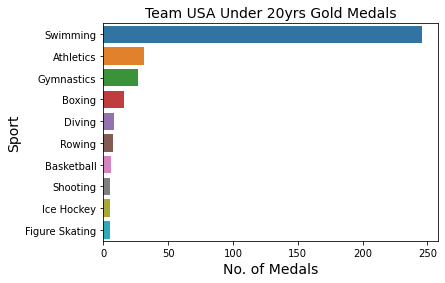

In [68]:
#Under 20: Team USA Top ten sports Gold Medal standings har graph

under_20_indx = under_20["Sport"].value_counts().head(10).index
No_of_medals = under_20["Sport"].value_counts().head(10)

sns.barplot(x = No_of_medals,y = under_20_indx);

plt.title("Team USA Under 20yrs Gold Medals",fontsize = 14)
plt.xlabel("No. of Medals",fontsize = 14)
plt.ylabel("Sport",fontsize = 14);



In [69]:
print("Most Team USA under twenties have done well in swimming")

Most Team USA under twenties have done well in swimming


## Teams
* _We will now ask some questions about olympic teams:_

### Q1: How many  teams have participated in Olympics?

In [70]:
all_teams =olympics_df.Team.nunique() #Get number of unique elements from the team column

In [71]:
print("{} Teams have atleast participated in the olympics between 1896 to Rio 2016".format(all_teams))

1184 Teams have atleast participated in the olympics between 1896 to Rio 2016


In [72]:
#National Olympic Committees that have  participated in any of the olympic games between 1896 to 2016
number_of_participating_countries = olympics_df.NOC.nunique()

In [73]:
print("{} National Olympic Committees have atleast participated in the olympics between 1896 to Rio 2016".format(number_of_participating_countries))

230 National Olympic Committees have atleast participated in the olympics between 1896 to Rio 2016


In [74]:
# 5 Teams with the highest appearance in olympic games
highest_appearances = olympics_df.Team.value_counts()

In [75]:
highest_appearances.head(5) #Check the firt five highest ranking teams

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: Team, dtype: int64

> #### Below is a horizonal bar graph representation of top 5 Teams with the highest appearance in olympic games

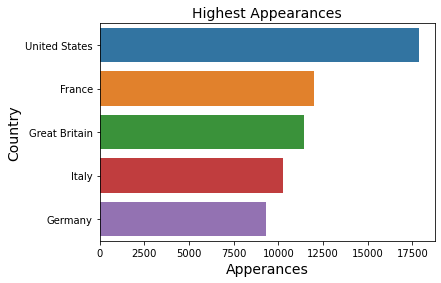

In [76]:
No_of_appearances = highest_appearances.head(5)
Team_indx = highest_appearances.head(5).index

sns.barplot(x =No_of_appearances,y =Team_indx)

plt.xlabel("Apperances",fontsize = 14)
plt.ylabel("Country",fontsize = 14)
plt.title("Highest Appearances",fontsize = 14);

### Q2: Which are among  the teams that have had one appearance in the olympics?

In [77]:
# 5 Nations with the lowest appearance
five_lowest_appearances = olympics_df.Team.value_counts().tail(5)

In [78]:
five_lowest_appearances

Demi-Mondaine-17    1
Rozenn-3            1
Demi-Mondaine-15    1
Essen               1
Mistral Hojris      1
Name: Team, dtype: int64

### Q3: What is the number of teams that have been  participating in every  olympic year?

In [79]:
#Teams every event year

olympics_df.groupby("Year")["Team"].nunique()

Year
1896     18
1900    190
1904     79
1906     52
1908     73
1912    102
1920     72
1924     93
1928     85
1932     72
1936    132
1948    131
1952    155
1956    149
1960    196
1964    199
1968    145
1972    157
1976    126
1980    111
1984    179
1988    211
1992    239
1994    101
1996    246
1998    106
2000    243
2002    114
2004    260
2006    113
2008    292
2010    116
2012    245
2014    119
2016    249
Name: Team, dtype: int64

### Sex
* _We will now ask some questions about the first olympics  and when women first  participated:_

In [80]:
#details of first ever olympics

first_olympic_df = olympics_df[olympics_df.Year.isin(["1896"])]

In [81]:
first_olympic_df

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [82]:
first_olympic_df.nunique() #Number of unique elements of first olympics 

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

### Q1: In which year did  we have the first female participants ?

In [83]:
#The year that women first paricipated in the  olymics
olympics_df.groupby("Year")["Sex"].nunique()#Group by year and get unique elements of Sex

Year
1896    1
1900    2
1904    2
1906    2
1908    2
1912    2
1920    2
1924    2
1928    2
1932    2
1936    2
1948    2
1952    2
1956    2
1960    2
1964    2
1968    2
1972    2
1976    2
1980    2
1984    2
1988    2
1992    2
1994    2
1996    2
1998    2
2000    2
2002    2
2004    2
2006    2
2008    2
2010    2
2012    2
2014    2
2016    2
Name: Sex, dtype: int64

In [84]:
print("Only males participated in the firt ever  olympics and women first participated in 1900")

Only males participated in the firt ever  olympics and women first participated in 1900


### Sports
* _We will now ask some questions about the first olympics Sports:_

### Q1: Which was the  most played Games in olympics history?

In [85]:
#Game most played

most_played_Sports = olympics_df.Sport.value_counts()

In [86]:
most_played_Sports

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

### Medals
* _We will now ask some questions about tolympics Medals:_

> _Much anlysis will focus on the best teams and olympians._

### Q1: How many Medals have been won in olympics history?

In [87]:
Medal = olympics_df["Medal"].value_counts()#Count the  values of medal column

In [88]:
Medal

No Medal    231333
Gold         13372
Bronze       13295
Silver       13116
Name: Medal, dtype: int64

### Q2: Which olympian has won most gold medals and in which sport?

In [89]:
#Athlete who has won most gold medals and in which sport
Athlete_with_most_Medals = olympics_df[olympics_df["Medal"] == "Gold"].value_counts(["Name","Team","Sport",])

In [90]:
Athlete_with_most_Medals.head(10) #See the firt ten olympians

Name                                             Team           Sport     
Michael Fred Phelps, II                          United States  Swimming      23
Raymond Clarence "Ray" Ewry                      United States  Athletics     10
Paavo Johannes Nurmi                             Finland        Athletics      9
Larysa Semenivna Latynina (Diriy-)               Soviet Union   Gymnastics     9
Mark Andrew Spitz                                United States  Swimming       9
Frederick Carlton "Carl" Lewis                   United States  Athletics      9
Usain St. Leo Bolt                               Jamaica        Athletics      8
Matthew Nicholas "Matt" Biondi                   United States  Swimming       8
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)  United States  Swimming       8
Sawao Kato                                       Japan          Gymnastics     8
dtype: int64

* Michael Fred Phelps, II from team USA has won most medals so far in olympics history

### Q3: How many medals did Michael Fred Phelps win in every olympic year?

In [91]:
Michael_Fred_Phelps = olympics_df[olympics_df.Name == "Michael Fred Phelps, II"]  #Michael_Fred_Phelps dataframe

In [92]:
Michael_Fred_Phelps.head(5) #See first five  rows

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
187887,"Michael Fred Phelps, II",M,15.0,193.0,91.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,No Medal
187888,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze
187889,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
187890,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold
187891,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Butterfly,Gold


In [93]:
#Medals - Group by Year
Michael_Fred_Phelps_Medals = Michael_Fred_Phelps.groupby("Year")["Medal"].value_counts()

In [94]:
Michael_Fred_Phelps

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
187887,"Michael Fred Phelps, II",M,15.0,193.0,91.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,No Medal
187888,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze
187889,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
187890,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold
187891,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Butterfly,Gold
187892,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Butterfly,Gold
187893,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Individual Medley,Gold
187894,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 400 metres Individual Medley,Gold
187895,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
187896,"Michael Fred Phelps, II",M,23.0,193.0,91.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 200 metres Freestyle,Gold


> #### Below is a pie chart representation of Michael Fred Phelps Medals.

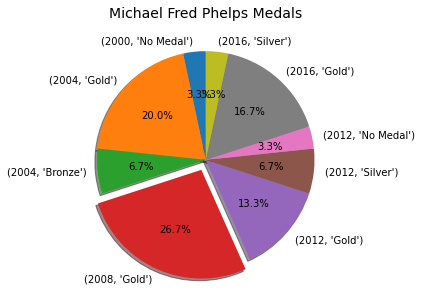

In [95]:
#Michael Fred Phelps Medals

plt.figure(figsize = (10,5))
Mich = Michael_Fred_Phelps_Medals
Mich_indx = Michael_Fred_Phelps_Medals.index

plt.pie(Mich, labels = Mich_indx ,autopct='%1.1f%%', startangle=90,shadow = True,explode = [0,0,0,0.1,0,0,0,0,0]);

plt.title("Michael Fred Phelps Medals",fontsize= 14);



> #### Below is a line graph representation of Michael Fred Phelps weight in all  his olympic games

In [96]:
Years_appeared = Michael_Fred_Phelps.Year
Weight = Michael_Fred_Phelps.Weight

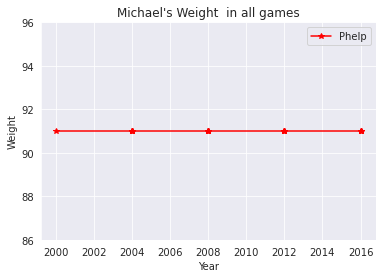

In [97]:
sns.set_style("darkgrid")
plt.plot(Years_appeared,Weight,"r-*");

plt.xlabel("Year")
plt.ylabel("Weight")
plt.title("Michael's Weight  in all games")
plt.legend (["Phelp"]);

### Q4: Which team has won most Gold medals?

In [98]:
gold_medals = olympics_df["Medal"] == "Gold"
olympics_df.loc[gold_medals,"Team"].value_counts()

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
                 ... 
Ecuador             1
Singapore           1
Baby-1              1
Cote d'Ivoire       1
Kosovo              1
Name: Team, Length: 242, dtype: int64

* Team United States has won most gold medal in  olympics history

In [99]:
#Get United  States  Gold Medals
United_State_gold_medals = (olympics_df["Medal"] == "Gold") & (olympics_df["Team"] == "United States")

In [100]:
US_gold_df = olympics_df.loc[United_State_gold_medals]
US_gold_df

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
283,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
609,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
739,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold
787,"Edgar Allen ""Ed"" Ablowich",M,19.0,182.0,68.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,Gold
1239,"Charles Edwin ""Charley"" Ackerly",M,22.0,NaN,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Wrestling,"Wrestling Men's Featherweight, Freestyle",Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266319,"Timothy R. ""Tim"" Young",M,26.0,172.0,77.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold
267204,Mariel Leigh Zagunis,F,19.0,173.0,72.0,United States,USA,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Women's Sabre, Individual",Gold
267205,Mariel Leigh Zagunis,F,23.0,173.0,72.0,United States,USA,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Women's Sabre, Individual",Gold
269922,Rbert Zimonyi,M,46.0,170.0,52.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Rowing,Rowing Men's Coxed Eights,Gold


### Q5:How many  gold medals has USA own in every olympic year?

In [101]:
#Gold Medal won every olympic year by Team USA

golds_every_olympics = US_gold_df[["Year","Medal"]]
golds_every_olympics.value_counts()


Year  Medal
1984  Gold     190
1996  Gold     157
2012  Gold     139
2016  Gold     137
2000  Gold     128
2008  Gold     121
2004  Gold     115
1920  Gold     111
1968  Gold     100
1960  Gold      97
1964  Gold      96
1924  Gold      92
1992  Gold      92
1988  Gold      89
1948  Gold      82
1952  Gold      77
1976  Gold      73
1972  Gold      72
1932  Gold      71
1904  Gold      65
1956  Gold      61
1936  Gold      51
1928  Gold      48
1912  Gold      46
1908  Gold      34
1998  Gold      25
1980  Gold      24
1900  Gold      18
1906  Gold      12
1896  Gold      11
2002  Gold       9
2006  Gold       9
2010  Gold       8
2014  Gold       8
1994  Gold       6
dtype: int64

> ### Below is a horizontal bargraph representatin of top ten teams with most medals

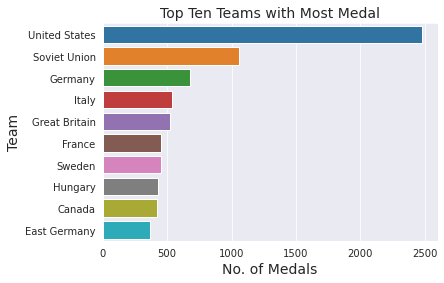

In [102]:
#Plot top ten teams with most  medals

Teams = olympics_df.loc[gold_medals,"Team"].value_counts().head(10).index
No_of_golds = olympics_df.loc[gold_medals,"Team"].value_counts().head(10)

sns.barplot(x = No_of_golds,y = Teams)

plt.title("Top Ten Teams with Most Medal",fontsize = 14)
plt.xlabel("No. of Medals",fontsize = 14)
plt.ylabel("Team",fontsize = 14);




### Q6: In which sport did US win most Gold medals?

In [103]:
#Get Team USA Sport with Gold Medals
US_gold_medals_df = olympics_df[(olympics_df["Medal"] == "Gold") & (olympics_df.Team == "United States")]
US_gold_medals_df.head(3)#View first 3 rows

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
283,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
609,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
739,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold


In [104]:
US_gold_medals_df[["Sport","Medal"]].value_counts().head(5)

Sport       Medal
Swimming    Gold     645
Athletics   Gold     537
Basketball  Gold     281
Rowing      Gold     160
Shooting    Gold     117
dtype: int64

### Q7: Which Sports won the most Silver medals?

In [105]:
#Top 5 Sports with most medals

Top_five = US_gold_medals_df["Sport"].value_counts().head(5)
Top_five

Swimming      645
Athletics     537
Basketball    281
Rowing        160
Shooting      117
Name: Sport, dtype: int64

> #### Below is a bar graph representation of Top five Sports with Most Silver Medals

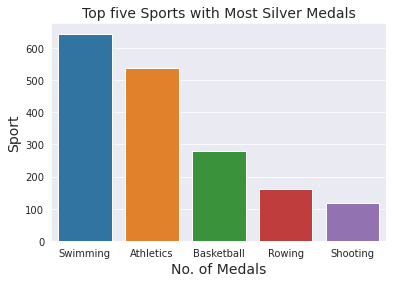

In [106]:
#Bar graph Top 5 Sports with most silver medals
top_five_sports = Top_five
no_of_medals = Top_five.index

sns.barplot(x = no_of_medals,y = top_five_sports)

plt.title("Top five Sports with Most Silver Medals",fontsize = 14)
plt.xlabel("No. of Medals",fontsize = 14)
plt.ylabel("Sport",fontsize = 14);

### Q8: In which Athletics events did US win most gold medals?

In [107]:
US_Athletics_gold = US_gold_medals_df["Sport"] == "Athletics"

US_golds = US_gold_medals_df.loc[US_Athletics_gold,"Event"].value_counts().head(10)
US_golds

Athletics Men's 4 x 400 metres Relay      81
Athletics Men's 4 x 100 metres Relay      63
Athletics Women's 4 x 100 metres Relay    50
Athletics Women's 4 x 400 metres Relay    38
Athletics Men's Long Jump                 23
Athletics Men's 400 metres                20
Athletics Men's 110 metres Hurdles        20
Athletics Men's 400 metres Hurdles        19
Athletics Men's Pole Vault                19
Athletics Men's Shot Put                  19
Name: Event, dtype: int64

> #### Below is a horizontal bar graph representation of Team USA top ten athletic events with the most Gold medals

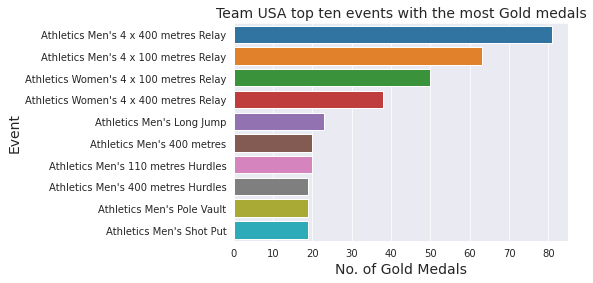

In [108]:
Golden_Events = US_gold_medals_df.loc[US_Athletics_gold,"Event"].value_counts().head(10).index
No_of_golds = US_gold_medals_df.loc[US_Athletics_gold,"Event"].value_counts().head(10)

sns.barplot(x = No_of_golds,y =Golden_Events);
plt.title("Team USA top ten events with the most Gold medals",fontsize = 14)
plt.xlabel("No. of Gold Medals",fontsize = 14)
plt.ylabel("Event",fontsize = 14);

### Q9: Which teams won the most silver medals?

In [109]:
#Silver medals

silver_medals = olympics_df["Medal"] == "Silver"

In [110]:
#Nation with most silver medals
olympics_df.loc[silver_medals,"Team"].value_counts()

United States                   1512
Soviet Union                     716
Germany                          627
Great Britain                    582
France                           518
                                ... 
Israel                             1
Netherlands Antilles               1
Costa Rica                         1
United States Virgin Islands       1
England                            1
Name: Team, Length: 273, dtype: int64

* Team USA has also won the most silver medals

### Q10: In  which sport did US win most  silver medals?

In [111]:
#Single out the team with most silver medals

US_Silver_medals_df = olympics_df[(olympics_df["Medal"] == "Silver") & (olympics_df.Team == "United States")]
US_Silver_medals_df.head(3) #View first 3 rows

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
186,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
286,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
311,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver


In [112]:
US_Silver_medals_df["Sport"].value_counts().head(3)

Athletics     313
Swimming      250
Ice Hockey    189
Name: Sport, dtype: int64

* US won most silver medals in athletics


> #### Below is a line graph representation of US olympians silver  medalists weights.

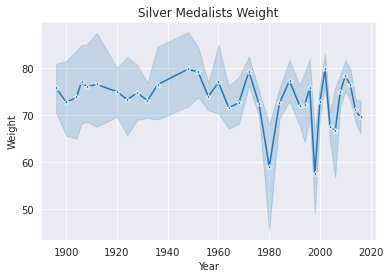

In [113]:
#US Silver  medalists Weight through  out the olympics 

sns.lineplot(x = "Year",y = "Weight",data = US_Silver_medals_df, marker = "*")
plt.title("Silver Medalists Weight");


* It  would be interesting to find out why the weights  went so low around the years 1980 and 2000

### Q11: In which athletic events did US win most Silver medals?

In [114]:
US_Athletics = US_Silver_medals_df["Sport"] == "Athletics"

US_Silver_medals_df.loc[US_Athletics,"Event"].value_counts().head(10)

Athletics Men's 110 metres Hurdles        20
Athletics Women's 4 x 400 metres Relay    20
Athletics Men's Shot Put                  20
Athletics Men's 200 metres                18
Athletics Men's Long Jump                 15
Athletics Men's 100 metres                15
Athletics Men's Pole Vault                14
Athletics Men's High Jump                 14
Athletics Men's 4 x 400 metres Relay      13
Athletics Men's 400 metres                13
Name: Event, dtype: int64

* Team US mostly got more silver medals in short races track events

### Conclusion

* If the data had Time Series it would have been even more helpful since that would have helped filter out olympics world records.
* There is need to find out why the number of participating olympians started to sharply fluctuate from around the year 2000.
* There is need to find  out why online sources do not note **John Quincy Adams Ward** as the oldest olympian.
> Our analysis has shown that **John Quincy Adams Ward** did not win any medal,that might be why most sources  note **Oscar Swahn of Sweden** as the oldest olympian.There is need to specify that **Oscar Swahn of Sweden** is deemed so because he is the oldest olympics gold medalist.__[Click here to read artilce](http://www.guinnessworldrecords.com/world-records/oldest-olympic-gold-medallist)__
* The top medalist in olympics history is **Michael Fred Phelps** who partcipated in swimming events.
> * Based on the success of Michael Phelps, olympians need to know that to have a better performance in swimming events olympians need to watch their weight.Michael Phelps had the same weight in all olympic events.
* Team United States has maximised its medals on short races track events and more especially relays.For better perfromances in relays those responsible need to bench mark with United States teams.

* Team United States has had the highest participants in olympics and the highest number of Gold Medalists.They have also topped  the table when it comes to silver medals.
* There is much that can be expolored in this data to answer even more interesting questions.
> 1. One can filter out their countrys olympic team and anlalyse the data.
> 1. One can filter out their countrys olympic team and anlalyse the data.
> 1. One can filter out a specific age and analyse the data to find out the best age for medal winning olympians.



#### References and Further reading.
* Forbes : How Data Analysis In Sports Is Changing The Game http://www.forbes.com/sites/forbestechcouncil/2019/01/31/how-data-analysis-in-sports-is-changing-the-game/?sh=1d95503d3f7b
* Guinness World Records: Oldest Olympic gold medalist https://www.guinnessworldrecords.com/world-records/oldest-olympic-gold-medallist
> * Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
> * Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
> * Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
  



In [117]:
# Execute this to save new versions of the notebook
jovian.commit(project="olympic-history-athletes-and-results-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "everndah/olympic-history-athletes-and-results-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/everndah/olympic-history-athletes-and-results-analysis


'https://jovian.ai/everndah/olympic-history-athletes-and-results-analysis'